<a href="https://colab.research.google.com/github/OrJaku/dw_matix/blob/master/Men_shoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import numpy as np
import datadotworld as dw
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
import eli5
from eli5.sklearn import PermutationImportance
from ast import literal_eval
from tqdm import tqdm_notebook


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


In [0]:
!pip install datadotworld[pandas]

In [2]:
cd "drive/My Drive/Colab Notebooks/Datascience"

/content/drive/My Drive/Colab Notebooks/Datascience


In [0]:
data = dw.load_dataset('datafiniti/mens-shoe-prices')

In [0]:
df = data.dataframes["7004_1"]
df.shape

(19387, 48)

In [0]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [0]:
df['prices_currency'].value_counts()

USD                                                   18524
AUD                                                     338
CAD                                                     303
EUR                                                     107
GBP                                                      22
New with box                                              3
PalmBeach Jewelry - Walmart.com                           3
UnbeatableSale.com, Inc. - Walmart.com                    3
new                                                       3
Wholesale Costume and Party Supplies - Walmart.com        2
Shoes.com                                                 1
SHOEBACCA LTD. - Walmart.com                              1
New without tags                                          1
Name: prices_currency, dtype: int64

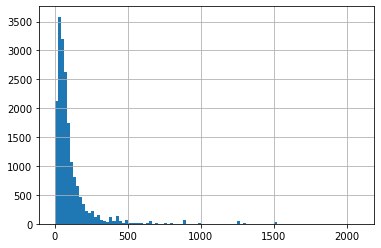

In [0]:
df_usd = df[df['prices_currency'] == "USD"].copy()
df_usd["prices_amountmin"] = df_usd.prices_amountmin.astype(float)
price_min = df_usd["prices_amountmin"] 
filter_value = np.percentile(price_min, 99.9)
df_usd_filter = df_usd[price_min < filter_value]
df_usd_filter.prices_amountmin.hist(bins=100)

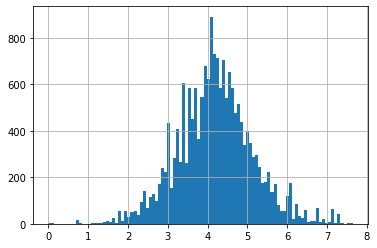

In [0]:
np.log1p(df_usd_filter.prices_amountmin).hist(bins=100)

In [0]:
df_usd_filter.to_csv("data/men_shous.csv", index=False)

In [0]:
df = pd.read_csv('data/men_shous.csv', low_memory=False)


In [21]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [0]:
def run_model(feats, model = DecisionTreeRegressor(max_depth=5)):
  x = df[feats].values 
  y = df['prices_amountmin'].values
  scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error')

  return np.mean(scores), np.std(scores)

In [0]:
def parse_features(x):
  output_dict = {}
  if str(x) == 'nan': 
    return output_dict
  features = literal_eval(x.replace('\\"', '"'))
  for item in features:
    new_key = item['key'].lower().strip()
    new_value = item['value'][0].lower().strip()
    output_dict[new_key] = new_value
  return output_dict
df['features_parsed'] = df['features'].map(parse_features)
df['features_parsed'].head().values

In [0]:
keys = set()
df['features_parsed'].map(lambda x: keys.update(x.keys()))
len(keys)

In [0]:
df['features_parsed'].sample